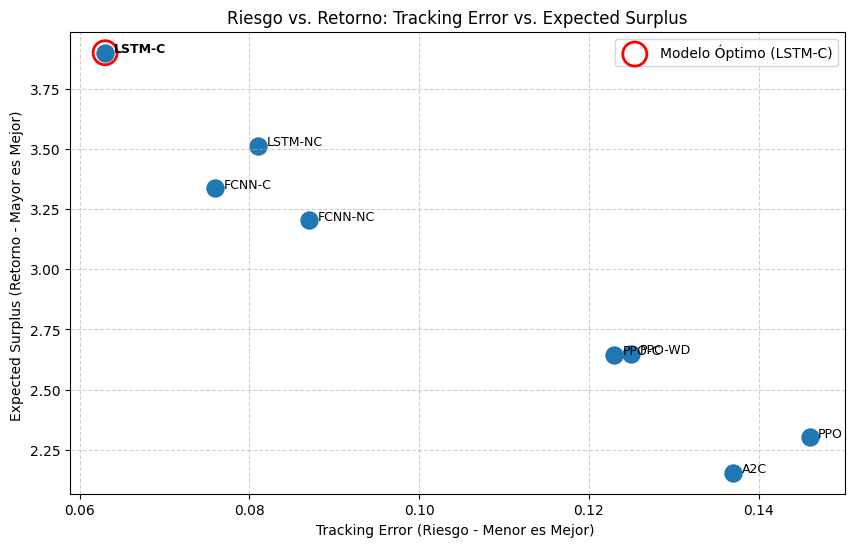

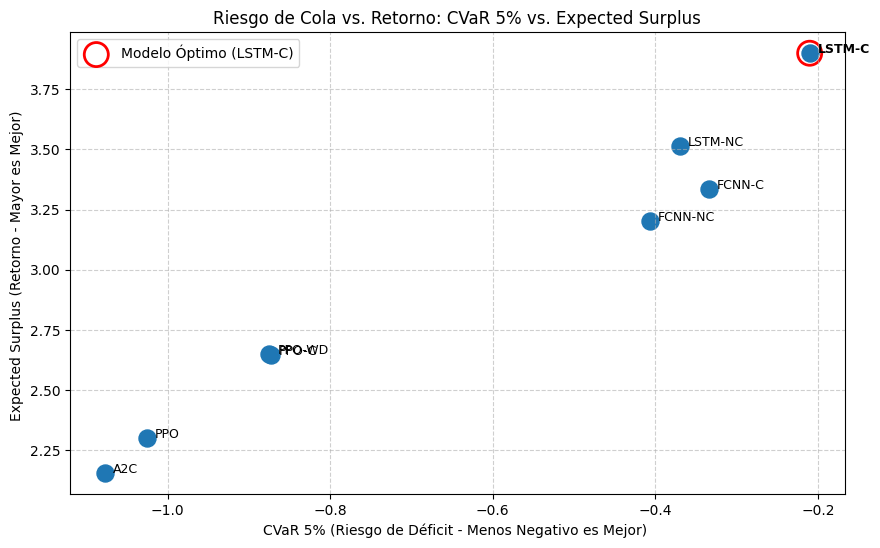

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. DATOS DE LOS RESULTADOS DE INFERENCIA (Extraídos de tu tabla)
data = {
    'Model': ['LSTM-C', 'LSTM-NC', 'FCNN-C', 'FCNN-NC', 'PPO-WD', 'PPO-C', 'PPO', 'A2C'],
    'Expected Surplus': [3.899, 3.513, 3.336, 3.203, 2.650, 2.645, 2.302, 2.155],
    'Tracking Error': [0.063, 0.081, 0.076, 0.087, 0.125, 0.123, 0.146, 0.137],
    'CVaR 5%': [-0.210, -0.370, -0.334, -0.407, -0.875, -0.873, -1.026, -1.077]
}
df = pd.DataFrame(data)

# ----------------------------------------------------
# GRÁFICA 1: Expected Surplus vs. Tracking Error (Riesgo Volátil)
# ----------------------------------------------------
plt.figure(figsize=(10, 6))
plt.scatter(df['Tracking Error'], df['Expected Surplus'], s=150)

# Etiquetar cada punto
for i, row in df.iterrows():
    plt.annotate(
        row['Model'], 
        (row['Tracking Error'] + 0.001, row['Expected Surplus']), 
        fontsize=9, 
        weight='bold' if row['Model'] == 'LSTM-C' else 'normal'
    )

# Configuración del gráfico
plt.title('Riesgo vs. Retorno: Tracking Error vs. Expected Surplus')
plt.xlabel('Tracking Error (Riesgo - Menor es Mejor) ')
plt.ylabel('Expected Surplus (Retorno - Mayor es Mejor) ')
plt.grid(True, linestyle='--', alpha=0.6)

# Destacar el modelo Pareto Óptimo (LSTM-C)
plt.scatter(df.loc[df['Model'] == 'LSTM-C', 'Tracking Error'], 
            df.loc[df['Model'] == 'LSTM-C', 'Expected Surplus'], 
            s=300, 
            facecolors='none', 
            edgecolors='red', 
            linewidths=2, 
            label='Modelo Óptimo (LSTM-C)')

plt.legend()
plt.show()

# ----------------------------------------------------
# GRÁFICA 2: Expected Surplus vs. CVaR 5% (Riesgo de Cola / Worst-Case Deficit)
# ----------------------------------------------------
plt.figure(figsize=(10, 6))
# Para el CVaR, un valor menos negativo es mejor, por lo que lo graficamos directamente.
plt.scatter(df['CVaR 5%'], df['Expected Surplus'], s=150) 

# Etiquetar cada punto
for i, row in df.iterrows():
    plt.annotate(
        row['Model'], 
        (row['CVaR 5%'] + 0.01, row['Expected Surplus']), 
        fontsize=9, 
        weight='bold' if row['Model'] == 'LSTM-C' else 'normal'
    )

# Configuración del gráfico
plt.title('Riesgo de Cola vs. Retorno: CVaR 5% vs. Expected Surplus')
# El CVaR es la pérdida. Menos negativo es mejor (más a la derecha).
plt.xlabel('CVaR 5% (Riesgo de Déficit - Menos Negativo es Mejor) ') 
plt.ylabel('Expected Surplus (Retorno - Mayor es Mejor) ')
plt.grid(True, linestyle='--', alpha=0.6)

# Destacar el modelo Pareto Óptimo (LSTM-C)
plt.scatter(df.loc[df['Model'] == 'LSTM-C', 'CVaR 5%'], 
            df.loc[df['Model'] == 'LSTM-C', 'Expected Surplus'], 
            s=300, 
            facecolors='none', 
            edgecolors='red', 
            linewidths=2, 
            label='Modelo Óptimo (LSTM-C)')

plt.legend()
plt.show()